<a href="https://colab.research.google.com/github/gisele-mgs/giselemms/blob/main/Atividade_Anova_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Atividade Prática: Análise Estatística e Regressão**

## **Objetivo**  
Utilizar os bancos de dados fornecidos para aplicar métodos de análise estatística e regressão. As tarefas estão divididas em etapas específicas para reforçar os conceitos.

---

## **Entrega**  
- Um relatório estruturado com:  
  - Introdução ao problema.  
  - Passos seguidos na análise.  
  - Resultados e interpretação.  
  - Gráficos e tabelas (quando necessário).  

**Prazo:** [Definir prazo de entrega]  


## **Parte 1: ANOVA One-Way e Post-Hoc**
**Banco de Dados:** **Wine Quality**  

**Tarefa:**  
1. Determine se há diferença significativa na **qualidade do vinho (`quality`)** em relação ao teor alcoólico (`alcohol`) dividido em três categorias:  
   - Baixo (`alcohol` < 10%)  
   - Médio (10% ≤ `alcohol` < 12%)  
   - Alto (`alcohol` ≥ 12%)  
2. Realize uma ANOVA One-Way.  
3. Se o resultado for significativo, aplique um teste post-hoc (Tukey) para identificar diferenças entre os grupos.

---



## **Atributos**:
1. `fixed acidity` - Acidez fixa do vinho.
2. `volatile acidity` - Acidez volátil do vinho.
3. `citric acid` - Quantidade de ácido cítrico no vinho.
4. `residual sugar` - Quantidade de açúcar residual.
5. `chlorides` - Quantidade de cloreto no vinho.
6. `free sulfur dioxide` - Quantidade de dióxido de enxofre livre.
7. `total sulfur dioxide` - Quantidade total de dióxido de enxofre.
8. `density` - Densidade do vinho.
9. `pH` - pH do vinho.
10. `sulphates` - Quantidade de sulfatos no vinho.
11. `alcohol` - Teor alcoólico do vinho.
12. `quality` - Qualidade do vinho (escala de 0 a 10, sendo 0 a pior e 10 a melhor qualidade).

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import seaborn as sns

In [ ]:
# URL do dataset Wine Quality
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

# Carregar o dataset
wine = pd.read_csv(url, sep=";")

# Exibir os primeiros registros
wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
wine["alcohol"]

,alcohol
0,9.4
1,9.8
2,9.8
3,9.8
4,9.4
...,...
1594,10.5
1595,11.2
1596,11.0
1597,10.2


In [ ]:
#criar três categorias
nivel = [0, 10, 12, float("inf")]

categorias =["baixo", "medio", "alto"]

# é adicionada uma coluna com as informações referentes ao nível
# de teor alcólico baixo, médio e alto do vinho
wine["categoria_alcohol"] = pd.cut(wine["alcohol"], bins=nivel, labels=categorias)

In [ ]:
wine["categoria_alcohol"]

,categoria_alcohol
0,baixo
1,baixo
2,baixo
3,baixo
4,baixo
...,...
1594,medio
1595,medio
1596,medio
1597,medio


variável dependente: qualidade do vinho

variável independente: categoria do alcool

informações retiradas da base de dados "wine"

In [ ]:
model = ols('quality ~ categoria_alcohol', data=wine).fit()

In [ ]:
anova_table = anova_lm(model, type=2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
categoria_alcohol,2.0,205.394064,102.697032,195.877314,8.447941e-77
Residual,1596.0,836.771039,0.524293,NaN,NaN


PR(>F): P-valor associado à estatística F.
Um valor muito pequeno (como (1.67 \times 10^{-31})) indica evidências para rejeitar a hipótese nula, ou seja, as médias das espécies são significativamente diferentes.

PR(>F): 	8.447941e-77

Nesse caso, indica que a variável independente (categoria alcool) tem uma relação significativa com a variável dependente (quality)


**Teste de Tukey (Tukey HSD)**, que compara todas as combinações de pares de grupos, ajustando os valores-p para múltiplas comparações.

In [ ]:
posthoc = pairwise_tukeyhsd(endog=wine['quality'], groups=wine['categoria_alcohol'], alpha=0.05)

# Exibindo os resultados
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  alto  baixo  -1.1439   0.0 -1.2998 -0.9879   True
  alto  medio  -0.6057   0.0 -0.7623 -0.4491   True
 baixo  medio   0.5382   0.0  0.4492  0.6272   True
---------------------------------------------------


Interpretação:

- Baixo vs Alto --> -1.1439
  - diferença significativa na qualidade do vinho


- Médio vs Alto --> -0.6057  
  - diferença significativa na qualidade do vinho

- Baixo vs Médio --> 0.5382
  - Não há diferença significativa na qualidade do vinho



## **Parte 2: ANOVA Two-Way e Interação**
**Banco de Dados:** **Titanic**  

**Tarefa:**  
1. Verifique se a **idade média (`age`)** dos passageiros varia de forma significativa com base:  
   - Na **classe de embarque (`pclass`)**  
   - No **gênero (`sex`)**  
2. Realize uma ANOVA Two-Way para avaliar o efeito individual de cada variável e sua interação.  
3. Interprete os resultados, incluindo o efeito de interação (se significativo).

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
titanic = sns.load_dataset("titanic")

titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Duas variáveis categóricas e uma variável numérica contínua.**

VARIÁVEL DEPENDENTE: idade (age)

VARIÁVEL INDEPENDENTE: classe social (pclass) e sexo (sex)

In [ ]:
titanic.rename(columns= {'class': 'classe'}, inplace=True)

model = ols('age ~ pclass + sex + pclass*sex', data=titanic).fit()

anova_table = anova_lm(model, type=2)
print(anova_table)


               df         sum_sq       mean_sq           F        PR(>F)
sex           1.0    1308.405450   1308.405450    7.349148  6.871593e-03
pclass        1.0   22702.436262  22702.436262  127.516711  2.603554e-27
pclass:sex    1.0      40.952238     40.952238    0.230024  6.316541e-01
Residual    710.0  126404.841994    178.034989         NaN           NaN


**Interpretação:**

  Valor de PR(>F):
   - sexo:  6.871593e-03
   - pclass: 2.603554e-27
   - interação pclass e sexo: 6.316541e-01


Tanto a variável **sexo** quanto a variável **pclass** têm efeitos significativos sobre a **idade média** dos passageiros.

 Há também uma interação significativa entre classe e sex. Isso sugere que a diferença de idade entre as classes pode variar dependendo do sexo do passageiro.


## **Parte 3: Regressão Linear**
**Banco de Dados:** **Heart Disease**  

**Tarefa:**  
1. Construa um modelo de regressão linear para prever a frequência cardíaca máxima atingida (`thalach`) com base na idade (`age`).  
2. Analise os coeficientes da regressão e avalie se a idade tem impacto significativo na frequência cardíaca máxima.  
3. Faça um gráfico de dispersão com a linha de regressão.


In [ ]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# Definir nomes de colunas (específicos para este dataset)
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach",
    "exang", "oldpeak", "slope", "ca", "thal", "target"
]

heart_disease = pd.read_csv(url, header=None, names=columns, na_values="?")

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
y = heart_disease["thalach"] #variável dependente
X = heart_disease["age"] #variável independente


In [ ]:
# Agora, adicionamos a constante à matriz X.
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()  # Ajuste do modelo de regressão linear

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                thalach   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     55.25
Date:                Fri, 17 Jan 2025   Prob (F-statistic):           1.11e-12
Time:                        19:04:01   Log-Likelihood:                -1352.3
No. Observations:                 303   AIC:                             2709.
Df Residuals:                     301   BIC:                             2716.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        203.8634      7.399     27.553      0.0

**1. R-squared (R²) e Ajustado (Adj. R²):**
 0.155

 O valor de R² indica que aproximadamente **15,5%** da variabilidade em **frequência cardíaca máxima atingida** é explicada pela variável **idade**. Isso sugere que o modelo ajustado não é suficinte para prever a frequência cardíaca máxima atingida (thalach) com base na idade (age).


2. Coeficientes:

Constante (Intercepto): **203.8634** o valor da variável dependente (idade) quando a variável independente (frequência cardíaca) é igual a **zero**.

Embora o valor possa não ter uma interpretação prática (essa idade não corresponde ao mundo real, nem é possível uma pessoa viva com frequÊncia iguala a zero), ele é necessário para o cálculo da reta de regressão.

Coeficiente da idade (age): **-0.9966**:

  - Esse coeficiente indica que, para cada aumento de 1 na idade, espera-se uma diminuição de aproximadamente -0.9966 na frequência cardíaca. Este é o efeito direto da idade sobre a frequência cardíaca.

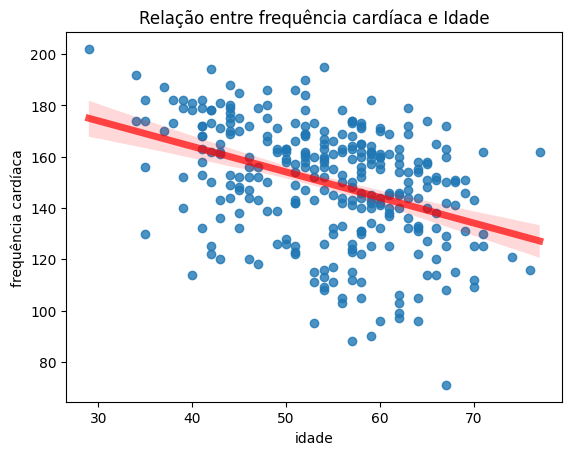

In [ ]:
import matplotlib.pyplot as plt

sns.regplot(x=X['age'], y=y, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Relação entre frequência cardíaca e Idade")
plt.xlabel("idade")
plt.ylabel("frequência cardíaca")
plt.show()

## **Parte 4: Regressão Múltipla**
**Banco de Dados:** **Adult Income**  

**Tarefa:**  
1. Construa um modelo de regressão múltipla para prever o número de horas trabalhadas por semana (`hours-per-week`) com base nos seguintes fatores:  
   - Idade (`age`)  
   - Nível educacional em anos (`education-num`)  
   - Gênero (`sex`) (transforme para variável binária)  
2. Interprete os coeficientes e discuta quais variáveis têm maior impacto na predição.  
3. Avalie a qualidade do modelo (R² ajustado, p-valores).

In [ ]:
import pandas as pd
import urllib.request

# URL do dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
    'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'
]

# Baixar o arquivo diretamente e carregar para o DataFrame
adult_data = pd.read_csv(url, names=column_names, na_values=' ?', sep=',\s', engine='python')

adult_data['sex'] = adult_data['sex'].map({'Male': 1, 'Female': 0})

adult_data.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,<=50K


In [ ]:

X = adult_data[["age", "education-num", "sex"]]

y = adult_data["hours-per-week"]  # Variável dependente

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         hours-per-week   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     887.4
Date:                Fri, 17 Jan 2025   Prob (F-statistic):               0.00
Time:                        19:04:37   Log-Likelihood:            -1.2676e+05
No. Observations:               32561   AIC:                         2.535e+05
Df Residuals:                   32557   BIC:                         2.536e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            28.0292      0.328     85.415

**1. R-squared (R²) e Ajustado (Adj. R²):**
0,076

 Indica que apenas 7,6% da variação nas horas por semana (a variável dependente) pode ser explicada pelas variáveis independentes (idade, nível de educação e sexo) no seu modelo de regressão.

**Coeficiente de age (0.0395):** Para cada aumento de 1 unidade na idade (em anos), o modelo prevê um aumento de 0.0395 horas por semana nas horas trabalhadas, assumindo que todas as outras variáveis permaneçam constantes. Isso sugere que a idade tem um impacto positivo, mas relativamente pequeno, nas horas por semana.

**Coeficiente de education-num (0.6901):** Para cada aumento de 1 unidade no número de anos de educação, o modelo prevê um aumento de 0.6901 horas por semana. Isso implica que o nível de educação tem um impacto positivo nas horas trabalhadas, o que é uma conclusão razoável.

**Coeficiente de sex (5.8697)**: Este coeficiente indica que, com base na codificação do sexo, a diferença entre os grupos é de 5.8697 horas por semana.

este valor reflete a diferença média nas horas por semana entre os dois grupos. Isso sugere que os homens, em média, trabalham 5.87 horas a mais por semana, de acordo com o modelo.


## **Parte 5: Escolha Livre**
**Banco de Dados:** **Covid-19 Dataset**  

**Tarefa:**  
1. Proponha uma análise estatística ou um modelo de regressão que possa ser útil para entender os dados de Covid-19. Sugestões:  
   - Relação entre o número de testes por milhão (`tests_per_million`) e casos confirmados (`total_cases`).  
   - Impacto da população (`population`) na mortalidade (`total_deaths`).  
2. Justifique sua escolha, aplique a técnica adequada e interprete os resultados.

In [ ]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.csv"

# Carregar o dataset
covid_data = pd.read_csv(url)

# Exibir os primeiros registros
covid_data.head()


,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2024-08-04,235214.0,0.0,0.000,7998.0,0.0,0.0,...,NaN,37.746,0.50,64.83,0.511,4.112877e+07,NaN,NaN,NaN,NaN
1,OWID_AFR,NaN,Africa,2024-08-04,13145380.0,36.0,5.143,259117.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.426737e+09,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2024-08-04,335047.0,0.0,0.000,3605.0,0.0,0.0,...,51.2,NaN,2.89,78.57,0.795,2.842318e+06,NaN,NaN,NaN,NaN
3,DZA,Africa,Algeria,2024-08-04,272139.0,18.0,2.571,6881.0,0.0,0.0,...,30.4,83.741,1.90,76.88,0.748,4.490323e+07,NaN,NaN,NaN,NaN
4,ASM,Oceania,American Samoa,2024-08-04,8359.0,0.0,0.000,34.0,0.0,0.0,...,NaN,NaN,NaN,73.74,NaN,4.429500e+04,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
import statsmodels.api as sm

# Remover as linhas com valores NaN nas colunas 'life_expectancy' e 'total_cases'
covid_data_clean = covid_data.dropna(subset=['human_development_index', 'hospital_beds_per_thousand'])

# Variável independente (leitos)
X = covid_data_clean['hospital_beds_per_thousand']
# Variável dependente (número de casos confirmados)
y = covid_data_clean['human_development_index']

# Agora, adicionamos a constante à matriz X
X = sm.add_constant(X)

# Ajuste do modelo de regressão linear
model = sm.OLS(y, X).fit()

# Exibir o resumo do modelo
print(model.summary())

                               OLS Regression Results                              
Dep. Variable:     human_development_index   R-squared:                       0.310
Model:                                 OLS   Adj. R-squared:                  0.306
Method:                      Least Squares   F-statistic:                     74.70
Date:                     Fri, 17 Jan 2025   Prob (F-statistic):           4.42e-15
Time:                             20:26:28   Log-Likelihood:                 120.37
No. Observations:                      168   AIC:                            -236.7
Df Residuals:                          166   BIC:                            -230.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

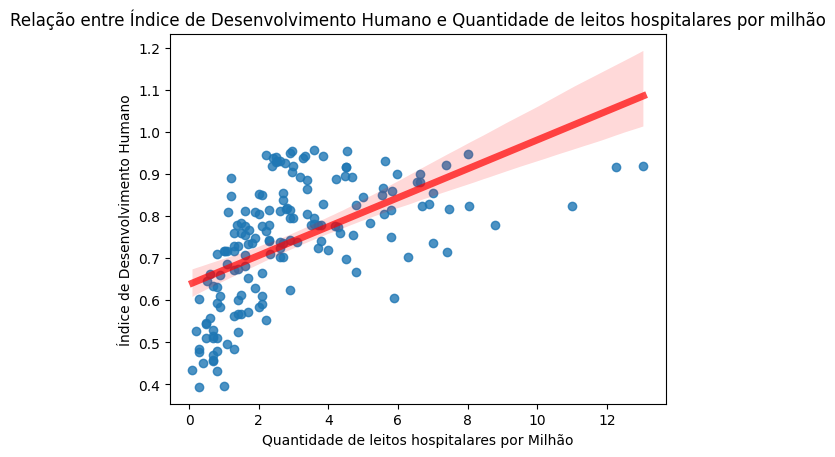

In [ ]:
import matplotlib.pyplot as plt

# Access the 'human_development_index' column from the DataFrame
sns.regplot(x=X['hospital_beds_per_thousand'], y=y, line_kws={"color":"r","alpha":0.7,"lw":5})
plt.title("Relação entre Índice de Desenvolvimento Humano e Quantidade de leitos hospitalares por milhão")
plt.xlabel("Quantidade de leitos hospitalares por Milhão")
plt.ylabel("Índice de Desenvolvimento Humano")
plt.show()

**1. R-squared (R²) e Ajustado (Adj. R²):**
 0.310




 O valor de R² indica que aproximadamente **31%** da variabilidade em **frequência cardíaca máxima atingida** é explicada pela variável **idade**. Isso sugere que a relação entre essas duas variáveis não é extremamente forte, mas há uma quantidade considerável de variação que pode ser atribuída ao número de leitos hospitalares por milhão.

**2. Coeficiente de Leitos Hospitalares por Milhão (0.0343):**

Este coeficiente indica que, para cada aumento de 1 leito hospitalar por milhão, o IDH aumenta em 0.0343.

O modelo sugere que, quanto maior o número de leitos hospitalares por milhão, maior será o IDH, embora o efeito seja relativamente pequeno (apenas 0.0343 pontos no IDH para cada aumento de 1 leito por milhão).